In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Wine\Wine_AG_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101,NaN,NaN,0.30,NaN,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	0
float64		column 2	0
float64		column 3	0
float64		column 4	0
int64		column 5	0
float64		column 6	3
float64		column 7	3
float64		column 8	0
float64		column 9	2
float64		column 10	0
float64		column 11	1
float64		column 12	4
float64		column 13	2


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
count,178.000000,178.000000,178.000000,178.000000,178.000000,175.000000,175.000000,178.000000,176.000000,178.000000,177.000000,174.000000,176.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.294457,2.012114,0.361854,1.582216,5.058090,0.955345,2.610057,747.380682
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.628779,0.997188,0.124453,0.567648,2.318286,0.227484,0.716489,313.376410
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,290.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.730000,1.150000,0.270000,1.247500,3.220000,0.780000,1.922500,501.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.350000,2.110000,0.340000,1.545000,4.690000,0.960000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.825000,0.437500,1.950000,6.200000,1.120000,3.177500,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


<AxesSubplot:>

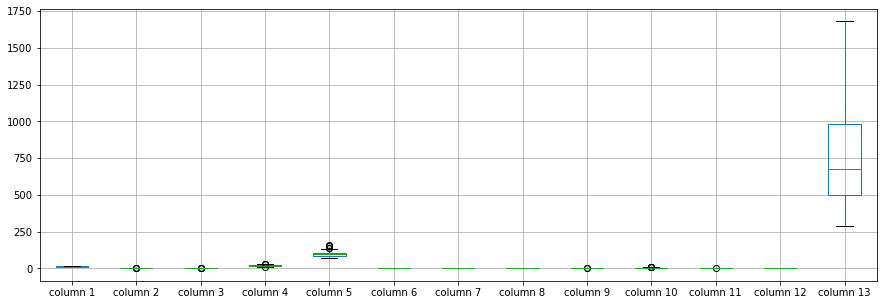

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      13.000618
column 2       2.336348
column 3       2.366517
column 4      19.494944
column 5      99.741573
column 6       2.294457
column 7       2.012114
column 8       0.361854
column 9       1.582216
column 10      5.058090
column 11      0.955345
column 12      2.610057
column 13    747.380682
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
column 1,1.000000,0.094397,0.211545,-0.310235,0.270798,0.288069,0.232824,-0.155929,0.138929,0.546364,-0.062824,0.076944,0.637607
column 2,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.340132,-0.409374,0.292977,-0.222348,0.248985,-0.560186,-0.368683,-0.201276
column 3,0.211545,0.164045,1.000000,0.443367,0.286587,0.126064,0.102402,0.186230,-0.003047,0.258887,-0.073323,0.009476,0.209790
column 4,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.317316,-0.360451,0.361922,-0.202910,0.018732,-0.286078,-0.278642,-0.447640
column 5,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.213600,0.191753,-0.256294,0.241763,0.199950,0.062268,0.070264,0.384175
column 6,0.288069,-0.340132,0.126064,-0.317316,0.213600,1.000000,0.864490,-0.447295,0.614136,-0.061015,0.447388,0.701508,0.494780
column 7,0.232824,-0.409374,0.102402,-0.360451,0.191753,0.864490,1.000000,-0.543805,0.650429,-0.179213,0.550160,0.791324,0.495582
column 8,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.447295,-0.543805,1.000000,-0.366203,0.139057,-0.269984,-0.502252,-0.321355
column 9,0.138929,-0.222348,-0.003047,-0.202910,0.241763,0.614136,0.650429,-0.366203,1.000000,-0.024989,0.299528,0.519321,0.324981
column 10,0.546364,0.248985,0.258887,0.018732,0.199950,-0.061015,-0.179213,0.139057,-0.024989,1.000000,-0.517161,-0.432158,0.306893


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [13,13+51,13+51+51,13+51+51,13+51+51+51+51,13+51+51+51+51+51,13+51+51+51+51+51+51,13+51+51+51+51+51,13+51+51+51+51,13+51+51+51,13+51+51,13+51,13], vae_layer = False, seed = 510)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [13]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 948.5279485529119
Epoch: 1 , loss: 945.9166093306108
Epoch: 2 , loss: 953.3383234197444
Epoch: 3 , loss: 947.7995439009233
Epoch: 4 , loss: 953.7539284446023
Epoch: 5 , loss: 954.8729248046875
Epoch: 6 , loss: 953.0751953125
Epoch: 7 , loss: 951.7276111949574
Epoch: 8 , loss: 952.9775113192471
Epoch: 9 , loss: 952.4906227805398
Epoch: 10 , loss: 954.8031283291904
Epoch: 11 , loss: 959.093672318892
Epoch: 12 , loss: 957.8421741832386
Epoch: 13 , loss: 953.1723743785511
Epoch: 14 , loss: 951.654463334517
Epoch: 15 , loss: 948.1765747070312
Epoch: 16 , loss: 945.237227006392
Epoch: 17 , loss: 955.3592862215909
Epoch: 18 , loss: 954.0288751775569
Epoch: 19 , loss: 953.493730024858
Epoch: 20 , loss: 950.7224564985795
Epoch: 21 , loss: 950.4030817205256
Epoch: 22 , loss: 946.4054177024148
Epoch: 23 , loss: 947.660195090554
Epoch: 24 , loss: 947.8189530806108
Epoch: 25 , loss: 952.1655217950994
Epoch: 26 , lo

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(178, 13)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      12.93
column 2       3.80
column 3       2.65
column 4      18.60
column 5     102.00
column 6       2.41
column 7       2.41
column 8       0.25
column 9       1.98
column 10      4.50
column 11      1.03
column 12      3.52
column 13    770.00
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Wine.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,0.0,0.0,0.0,0.0,0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0,-2.717558,-3.159198,0.0,-2.729276,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.0,0.0,0.0,0.0,0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
174,0.0,0.0,0.0,0.0,0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
175,0.0,0.0,0.0,0.0,0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
176,0.0,0.0,0.0,0.0,0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(1163.579658965823, 10898.078031484092)

In [17]:
NRMS=numerator/denominator
NRMS


0.1067692537715632

In [18]:
new_df.iloc[66,:]

column 1      13.11
column 2       1.01
column 3       1.70
column 4      15.00
column 5      78.00
column 6       2.98
column 7       3.18
column 8       0.26
column 9       2.28
column 10      5.30
column 11      1.12
column 12      3.18
column 13    502.00
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,14.23,1.71,2.43,15.6,127,2.800000,3.060000,0.28,2.290000,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100,2.650000,2.760000,0.26,1.280000,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101,0.082442,0.080802,0.30,0.080724,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113,3.850000,3.490000,0.24,2.180000,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118,2.800000,2.690000,0.39,1.820000,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.680000,0.610000,0.52,1.060000,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102,1.800000,0.750000,0.43,1.410000,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120,1.590000,0.690000,0.43,1.350000,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120,1.650000,0.680000,0.53,1.460000,9.30,0.60,1.62,840.0


In [20]:
imputations[-1].to_excel("Wine_AG_1(imp).xlsx", index=False, header=False)